# Training Spectrally Normalized Wasserstein-GAN with Gradient Penalty - MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
BATCH_SIZE = 128
LR = 5e-5
NUM_EPOCHES = 100
CRIT_REPEATS = 5

## Preprocessing

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [6]:
trainset = datasets.MNIST('../data/MNIST/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

## Model

In [7]:
from gans_package.models import SNGAN_Discriminator
from gans_package.models import DCGAN_Generator

In [8]:
latent_dim = 64
g_out_size = 1
g_hidden_size = 256

d_hidden_size = 16

g = DCGAN_Generator(latent_dim, g_out_size, g_hidden_size).to(device)
d = SNGAN_Discriminator(g_out_size, d_hidden_size).to(device)
print(g)
print(d)

from gans_package.utils import weights_init 

g = g.apply(weights_init)
d = d.apply(weights_init)

DCGAN_Generator(
  (generator): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(64, 1024, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): ConvTranspose2d(256, 1, kernel_size=(4, 4), stride=(2, 2))
    (4): Tanh()
  )
)
SNGAN_Discriminator(
  (discriminator): Sequential(
    (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)

In [9]:
for img, label in trainloader:
    img = img.to(device)
    label = label.to(device)
    
    noise = torch.randn(img.size(0), latent_dim).to(device)
    
    print("Input Image Dimensions: {}".format(img.size()))
    print("Noise Dimensions: {}".format(noise.size()))
    print("Label Dimensions: {}".format(label.size()))
    print("-"*100)
    
    fake = g(noise)
    pred = d(fake)
    
    print("Fake Output Dimensions: {}".format(fake.size()))
    print("Prediction Output Dimensions: {}".format(pred.size()))
    break

Input Image Dimensions: torch.Size([128, 1, 28, 28])
Noise Dimensions: torch.Size([128, 64])
Label Dimensions: torch.Size([128])
----------------------------------------------------------------------------------------------------
Fake Output Dimensions: torch.Size([128, 1, 28, 28])
Prediction Output Dimensions: torch.Size([128, 1])


## Training

In [10]:
from gans_package.Loss_F import W_Crit_Loss, W_Gen_Loss

w_crit_loss = W_Crit_Loss(10)
w_gen_loss = W_Gen_Loss()
g_optimizer = torch.optim.Adam(g.parameters(), lr=LR, betas=(0.5, 0.999))
d_optimizer = torch.optim.Adam(d.parameters(), lr=LR, betas=(0.5, 0.999))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1: Generator Loss: -0.6131341592716509; Discriminator Loss: 4.990213807254453


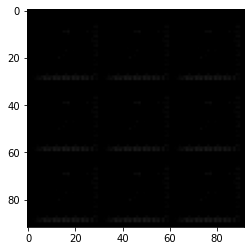

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 2: Generator Loss: -0.7257057545281677; Discriminator Loss: 1.620863540442003


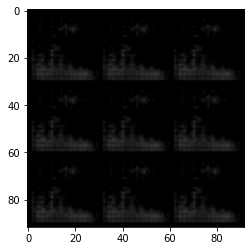

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 3: Generator Loss: -0.6277078264303553; Discriminator Loss: 0.9791339448011763


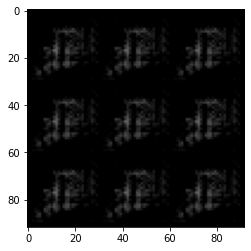

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 4: Generator Loss: -0.4596849779393881; Discriminator Loss: 0.8051914349420737


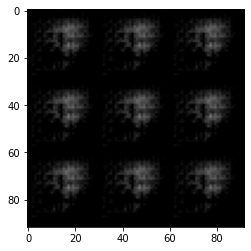

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5: Generator Loss: -0.3664047870162461; Discriminator Loss: 0.3080637045315844


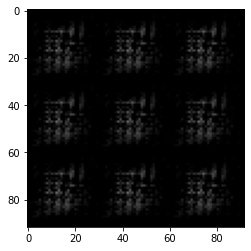

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 6: Generator Loss: -0.356680896252144; Discriminator Loss: 0.10078969561913877


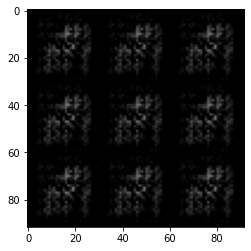

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 7: Generator Loss: -0.2796903198271164; Discriminator Loss: -0.11729212142129944


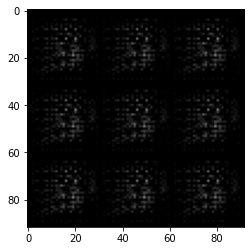

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 8: Generator Loss: -0.20474791263929135; Discriminator Loss: -0.4723925534500748


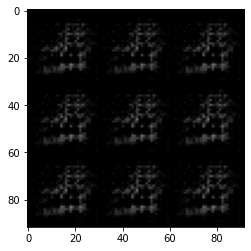

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 9: Generator Loss: -0.10220900558378063; Discriminator Loss: -0.8667678294691454


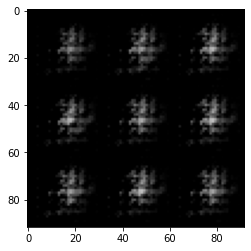

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 10: Generator Loss: -0.5042482853404431; Discriminator Loss: -0.31248355544388673


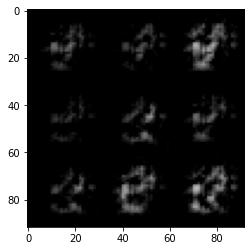

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 11: Generator Loss: -0.35190276093860423; Discriminator Loss: -0.4125049077180908


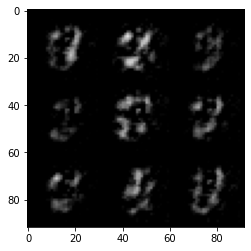

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 12: Generator Loss: -0.07777120348270625; Discriminator Loss: -0.5725290268850225


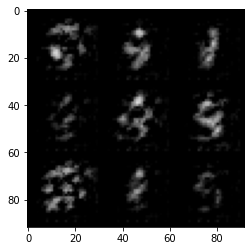

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 13: Generator Loss: 0.15045826597464904; Discriminator Loss: -0.7107668376045182


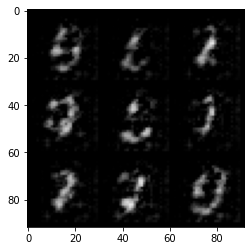

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 14: Generator Loss: 0.08827073221851482; Discriminator Loss: -0.7740741266624753


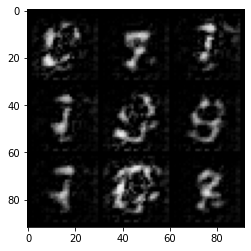

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 15: Generator Loss: 0.06322599721472782; Discriminator Loss: -0.7674911810645164


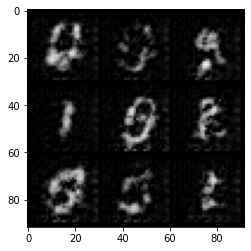

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 16: Generator Loss: 0.033061127988065576; Discriminator Loss: -0.7776580154895785


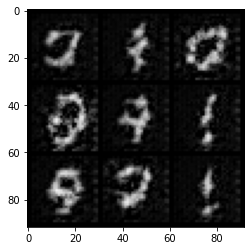

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 17: Generator Loss: 0.1986264358036347; Discriminator Loss: -0.7635196128379552


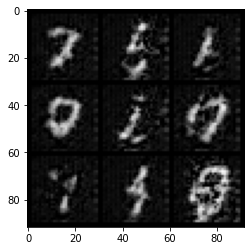

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 18: Generator Loss: -0.03914071830001467; Discriminator Loss: -0.7298972571773057


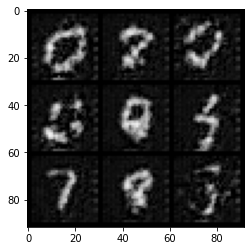

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 19: Generator Loss: -0.12266571415679604; Discriminator Loss: -0.7329282300177411


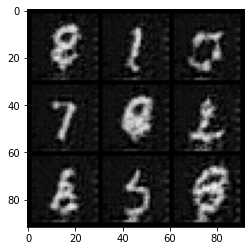

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 20: Generator Loss: 0.08127999543122995; Discriminator Loss: -0.7134917886780783


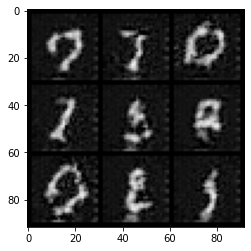

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 21: Generator Loss: 0.19218349183149047; Discriminator Loss: -0.7306009457341384


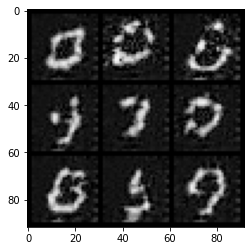

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 22: Generator Loss: 0.3077933862199709; Discriminator Loss: -0.7370186738113857


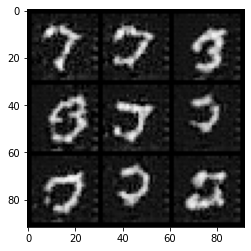

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 23: Generator Loss: 0.42340340559829526; Discriminator Loss: -0.7349045917614185


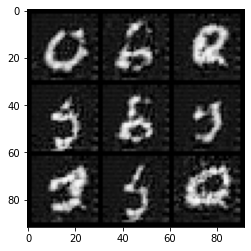

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 24: Generator Loss: 0.5722058183138272; Discriminator Loss: -0.7089817121656716


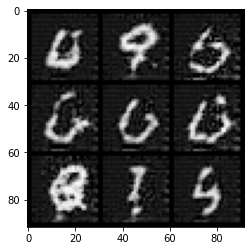

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25: Generator Loss: 0.5920881233823452; Discriminator Loss: -0.6682457225742746


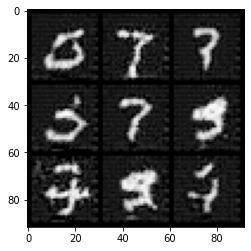

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 26: Generator Loss: 0.563552216866981; Discriminator Loss: -0.6344383426947887


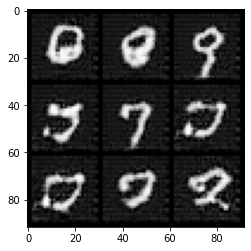

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 27: Generator Loss: 0.4242702443937042; Discriminator Loss: -0.617051682273335


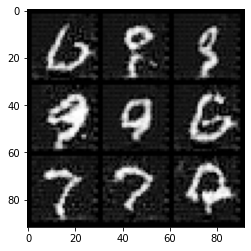

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 28: Generator Loss: 0.41593697982063804; Discriminator Loss: -0.5905877678124882


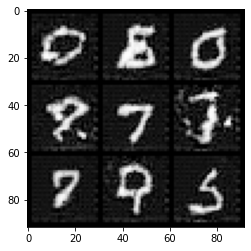

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 29: Generator Loss: 0.41403645970650127; Discriminator Loss: -0.5574609338252279


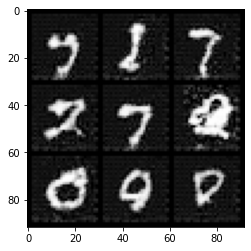

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 30: Generator Loss: 0.43723558158135173; Discriminator Loss: -0.5316251841467077


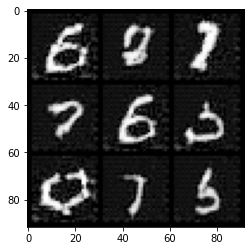

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 31: Generator Loss: 0.3381523329522342; Discriminator Loss: -0.5405676068972423


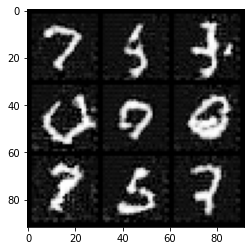

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 32: Generator Loss: 0.2896966908131041; Discriminator Loss: -0.521289144555675


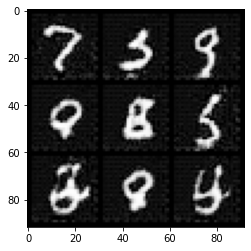

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 33: Generator Loss: 0.24613912403186375; Discriminator Loss: -0.49447719193438955


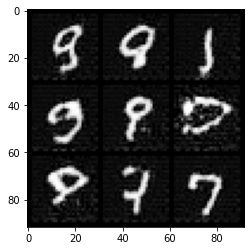

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 34: Generator Loss: 0.23420410154899682; Discriminator Loss: -0.4850795456516081


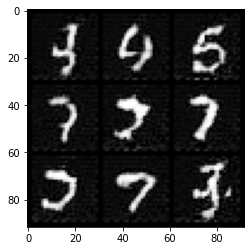

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35: Generator Loss: 0.2539465804197101; Discriminator Loss: -0.45696005994863037


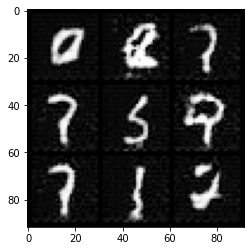

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 36: Generator Loss: 0.5601806213566934; Discriminator Loss: -0.43576710399136975


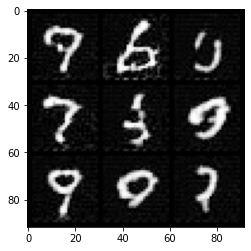

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 37: Generator Loss: 0.7210981877776844; Discriminator Loss: -0.4174564310323707


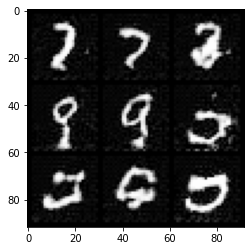

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 38: Generator Loss: 0.9440221018326689; Discriminator Loss: -0.41340073487286516


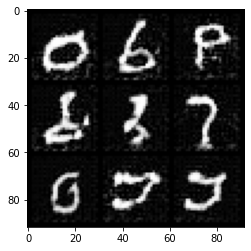

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 39: Generator Loss: 0.9316094377473283; Discriminator Loss: -0.4125768528365568


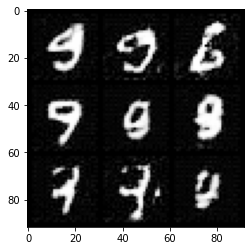

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 40: Generator Loss: 0.8367272063073065; Discriminator Loss: -0.40863601667111493


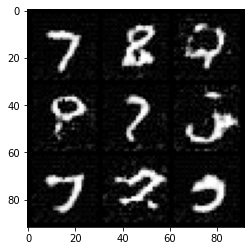

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 41: Generator Loss: 0.8335804580839903; Discriminator Loss: -0.3942075663967047


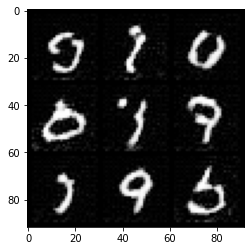

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 42: Generator Loss: 0.9013546194210013; Discriminator Loss: -0.39655234828901126


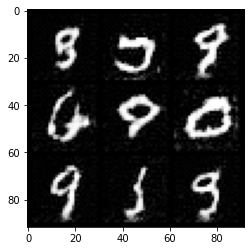

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 43: Generator Loss: 0.7859089789526866; Discriminator Loss: -0.38010065359458634


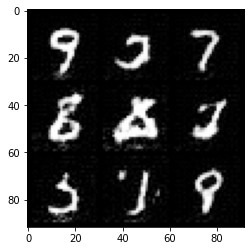

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 44: Generator Loss: 0.8286370764861801; Discriminator Loss: -0.3554144173312483


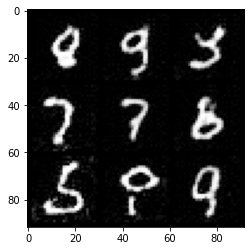

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 45: Generator Loss: 0.816263679537112; Discriminator Loss: -0.3514704793254767


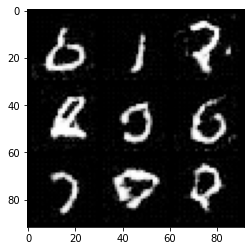

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 46: Generator Loss: 0.7653574998548099; Discriminator Loss: -0.3352070958232446


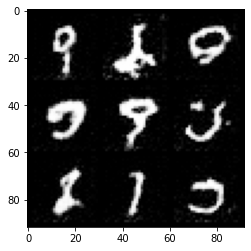

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 47: Generator Loss: 1.0605781829075964; Discriminator Loss: -0.331523473050072


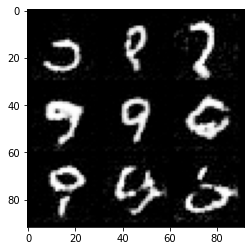

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 48: Generator Loss: 0.813462886268269; Discriminator Loss: -0.30671524248048165


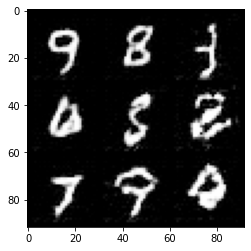

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 49: Generator Loss: 0.7704868715232623; Discriminator Loss: -0.3070938350398468


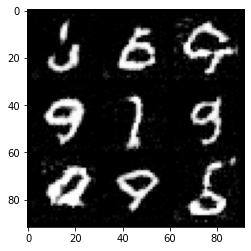

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50: Generator Loss: 0.9178089725771057; Discriminator Loss: -0.3065236216653257


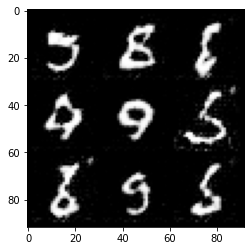

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 51: Generator Loss: 1.1001204039260093; Discriminator Loss: -0.280090084833218


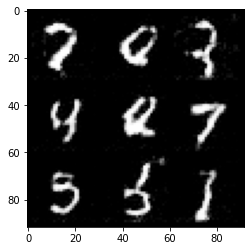

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 52: Generator Loss: 0.4934111785794944; Discriminator Loss: -0.2603389978047405


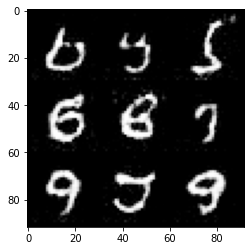

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 53: Generator Loss: 0.5715886065915131; Discriminator Loss: -0.2762230619669022


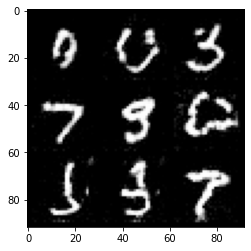

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 54: Generator Loss: 0.5079435381109018; Discriminator Loss: -0.2191830265651474


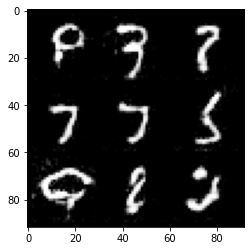

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 55: Generator Loss: 0.06058761417103221; Discriminator Loss: -0.2307275986036799


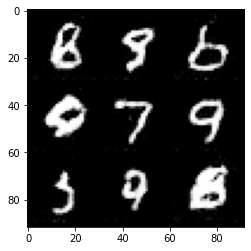

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 56: Generator Loss: -0.18489899576854096; Discriminator Loss: -0.2132103815940873


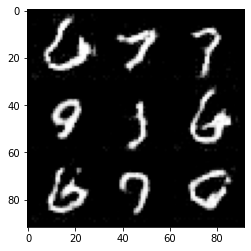

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 57: Generator Loss: 0.1378078434342292; Discriminator Loss: -0.22308320494602998


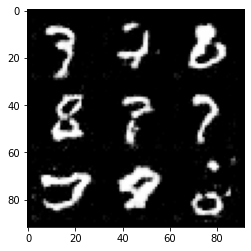

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 58: Generator Loss: -0.19525503938688016; Discriminator Loss: -0.20202878731082502


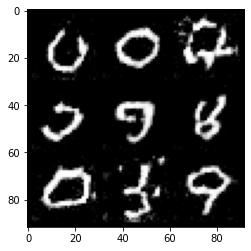

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 59: Generator Loss: 0.018534167083913585; Discriminator Loss: -0.24267552697947664


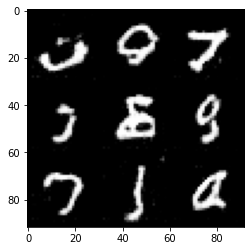

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 60: Generator Loss: -1.5781630765495778; Discriminator Loss: -6.401295606885698


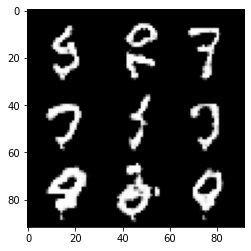

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 61: Generator Loss: -1.3846234768422554; Discriminator Loss: -1.4661201086133595


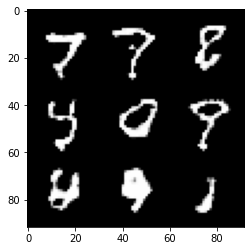

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 62: Generator Loss: -0.6775454415766987; Discriminator Loss: -0.5815008977161987


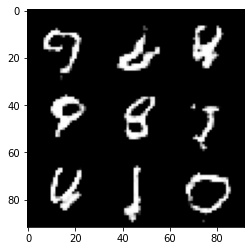

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 63: Generator Loss: -0.7140089787209212; Discriminator Loss: -0.44547315950729893


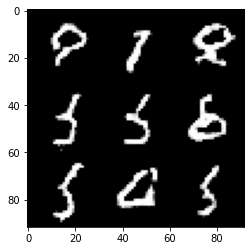

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 64: Generator Loss: -1.2107430485202306; Discriminator Loss: -0.5133648894822547


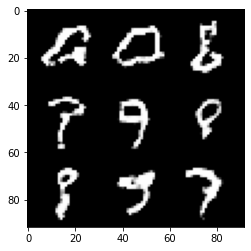

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 65: Generator Loss: -1.1158256557212074; Discriminator Loss: -0.4882365176617023


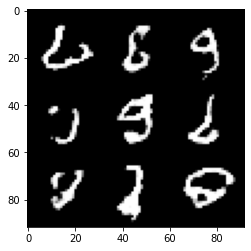

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 66: Generator Loss: -0.8225494250099161; Discriminator Loss: -0.4694934475714206


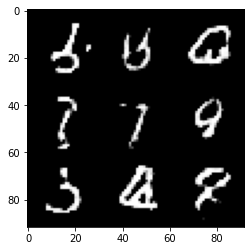

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 67: Generator Loss: -0.6197332592029721; Discriminator Loss: -0.4672676367220533


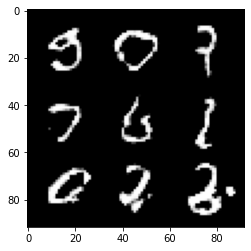

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 68: Generator Loss: 0.23736825073038592; Discriminator Loss: -0.5518817561458166


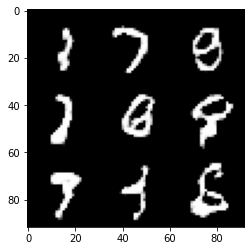

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 69: Generator Loss: 0.6587261810684318; Discriminator Loss: -0.5433332584305862


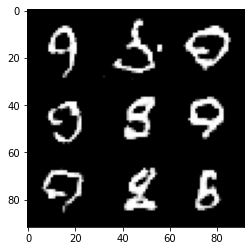

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 70: Generator Loss: 1.4695820510903719; Discriminator Loss: -0.5064377257413766


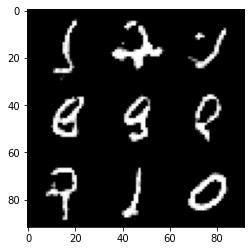

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 71: Generator Loss: 1.3348007012786134; Discriminator Loss: -0.568484678479241


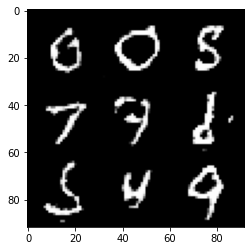

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 72: Generator Loss: 1.3360087330351824; Discriminator Loss: -0.5524816164655537


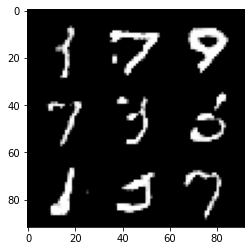

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 73: Generator Loss: 1.2602070364862807; Discriminator Loss: -0.568607040716291


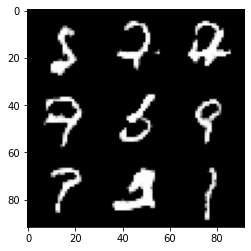

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 74: Generator Loss: 1.4539131401126573; Discriminator Loss: -0.571934984105705


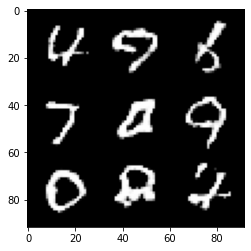

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 75: Generator Loss: 1.551447034501699; Discriminator Loss: -0.46261682415138783


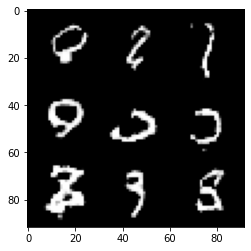

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 76: Generator Loss: 1.56304985661703; Discriminator Loss: -0.5478235327549331


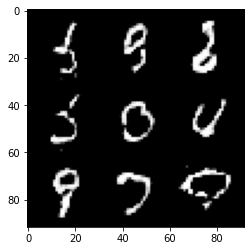

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 77: Generator Loss: 1.6439633035440562; Discriminator Loss: -0.5081163500243029


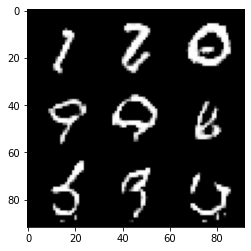

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 78: Generator Loss: 0.9561694485109562; Discriminator Loss: -0.4351688949911515


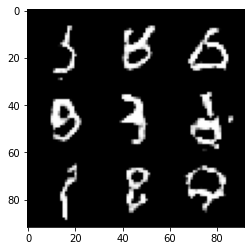

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 79: Generator Loss: 1.6432323251396164; Discriminator Loss: -0.5452502488144743


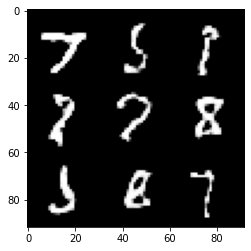

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 80: Generator Loss: 1.9065302239178912; Discriminator Loss: -0.5653841256968247


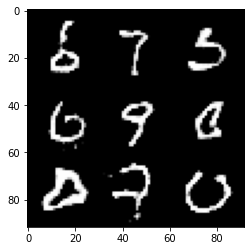

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 81: Generator Loss: 2.056811220856554; Discriminator Loss: -0.48962454096610747


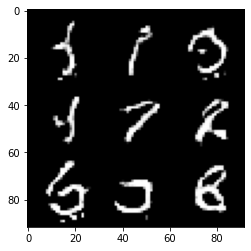

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 82: Generator Loss: 2.1120666113139976; Discriminator Loss: -0.5003103334472567


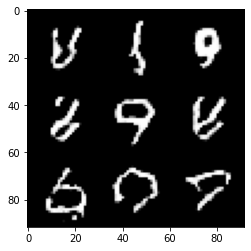

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 83: Generator Loss: 1.5841105037104728; Discriminator Loss: -0.4384890828281641


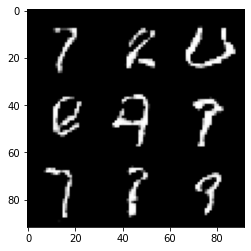

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 84: Generator Loss: 2.042983943783144; Discriminator Loss: -0.3554521639289251


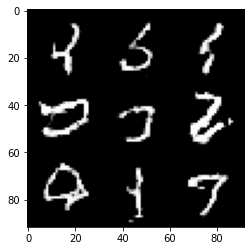

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 85: Generator Loss: 1.8711723411785388; Discriminator Loss: -0.4039335811363738


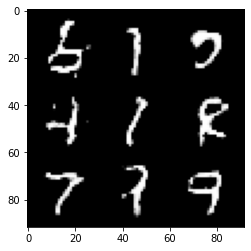

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 86: Generator Loss: 2.2707253808517063; Discriminator Loss: -0.4732404161514695


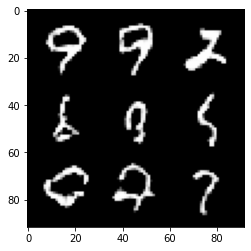

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 87: Generator Loss: 2.287930741882337; Discriminator Loss: -0.3904805451027874


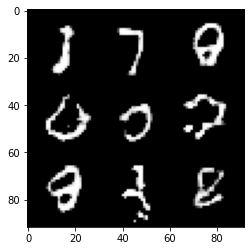

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 88: Generator Loss: 2.240379920670155; Discriminator Loss: -0.41321468448032095


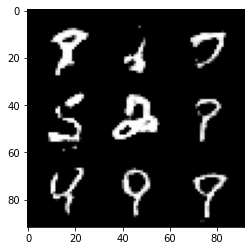

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 89: Generator Loss: 2.3564155115041014; Discriminator Loss: -0.478197078515631


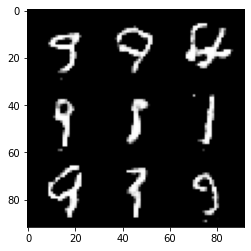

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 90: Generator Loss: 3.194803369443999; Discriminator Loss: -0.30109728305086275


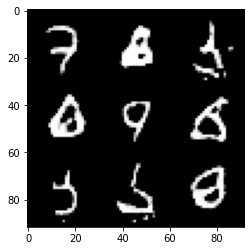

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 91: Generator Loss: 3.34174579356525; Discriminator Loss: -0.3036002002974182


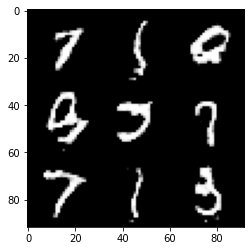

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 92: Generator Loss: 2.6262054612784627; Discriminator Loss: -0.40590135702001534


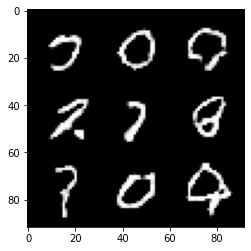

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 93: Generator Loss: 2.4477022594091165; Discriminator Loss: -0.36843353337459367


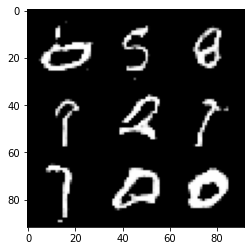

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 94: Generator Loss: 2.0850753037215295; Discriminator Loss: -0.26709589335296957


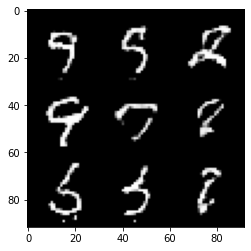

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 95: Generator Loss: 2.591363718578302; Discriminator Loss: -0.25954686001515076


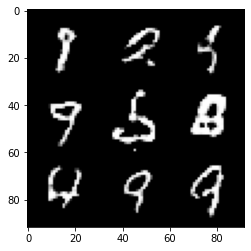

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 96: Generator Loss: 3.1857515441408673; Discriminator Loss: -0.2632589229539451


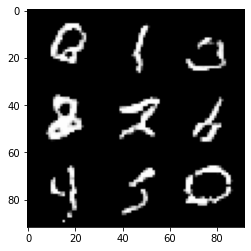

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 97: Generator Loss: 2.9126583877792047; Discriminator Loss: -0.2653464794865866


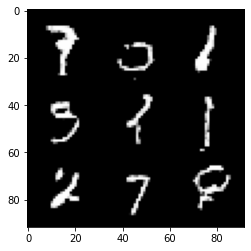

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 98: Generator Loss: 2.6329577030546503; Discriminator Loss: -0.20660918362136832


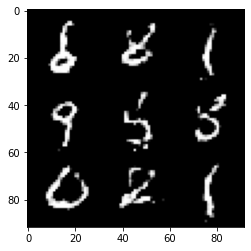

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 99: Generator Loss: 2.5670740928874216; Discriminator Loss: -0.20016332823139762


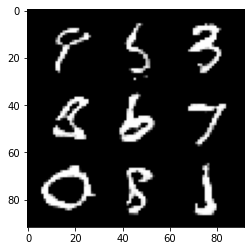

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 100: Generator Loss: 3.121855604218077; Discriminator Loss: -0.25395200367468895


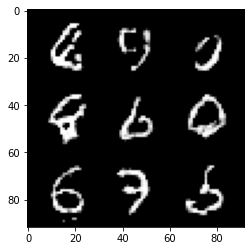

In [11]:
from gans_package.utils import Wasserstein_Crit_Train

loss_hist = {}
loss_hist["generator loss"] = []
loss_hist["discriminator loss"] = []

for epoch in range(1, NUM_EPOCHES+1):
    
    epoch_d_loss = 0
    epoch_g_loss = 0
    
    for real, label in trainloader:
        b = real.size(0)
        real = real.to(device)
        
        loss = Wasserstein_Crit_Train(d, g, d_optimizer, w_crit_loss, CRIT_REPEATS, real, latent_dim, device=device)
        epoch_d_loss += loss
        
        g_optimizer.zero_grad()
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
        pred = d(fake)
        
        g_loss = w_gen_loss(pred)
        g_loss.backward()
        epoch_g_loss += g_loss.item()
        g_optimizer.step()
        
    epoch_g_loss /= len(trainloader)
    epoch_d_loss /= len(trainloader)
    
    loss_hist["generator loss"].append(epoch_g_loss)
    loss_hist["discriminator loss"].append(epoch_d_loss)
    
    print("Epoch {}: Generator Loss: {}; Discriminator Loss: {}".format(epoch, epoch_g_loss, epoch_d_loss))
    
    if epoch%1==0:
        noise = torch.randn(b, latent_dim).to(device)
        fake = g(noise)
    
        images = fake.detach().to("cpu")
        images_grid = make_grid(images[:9], nrow=3)
        plt.imshow(images_grid.permute(1, 2, 0).squeeze())
        plt.show()